In [1]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


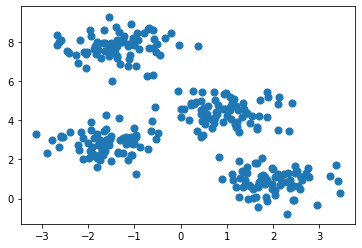

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,Y_true = make_blobs(n_samples= 300, centers = 4,cluster_std = 0.60,random_state = 0)
plt.scatter(X[:,0],X[:,1],s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4)
kmeans.fit(X)
Y_kmeans = kmeans.predict(X)
Y_kmeans

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3], d

In [4]:
!pip install pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
!pip install nltk
import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


df = pd.read_csv('https://github.com/pbindusagar/EMS_Predictions/blob/master/EMS_Checks_CSV_File.csv?raw=true', index_col=0)
df.head(15)

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


,Security,MemoNumber,PackageName,ValuationDate,RuleName,Comment,updated by,updatedDateTime
UserBank,,,,,,,,
BT,TEST12345,1,Package1,7/28/20,Rule1,Trade booked per Recap,R System,7/28/20 16:58
BT,TEST12346,2,Package1,7/28/20,Rule1,Trade booked per Recap,R System,7/28/20 16:58
BT,TEST12347,3,Package1,7/28/20,Rule2,"valid, Trade booked as per recap",P System,7/28/20 16:30
BT,TEST12348,4,Package1,7/28/20,Rule1,Trade booked per Recap,P System,7/28/20 16:30
BT,TEST12349,5,Package1,7/28/20,Rule1,Trade booked per Recap,P System,7/28/20 16:30
BT,TEST12350,6,Package1,7/28/20,Rule1,Trade booked per Recap,R System,7/28/20 16:58
BT,TEST12351,7,Package1,7/28/20,Rule1,Trade booked per Recap,R System,7/28/20 16:58
BT,TEST12352,8,Package1,7/28/20,Rule2,verified valid,P System,7/28/20 16:30
BT,TEST12353,9,Package1,7/28/20,Rule1,"valid trade , booked as per recap",P System,7/28/20 16:30


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['Comment']
data.head(15)

UserBank
BT                Trade booked per Recap
BT                Trade booked per Recap
BT      valid, Trade booked as per recap
BT                Trade booked per Recap
BT                Trade booked per Recap
BT                Trade booked per Recap
BT                Trade booked per Recap
BT                        verified valid
BT    valid trade ,  booked as per recap
BT     Not Duplicate, verified per recap
Name: Comment, dtype: object

In [6]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head(15)

,booked,duplicate,recap,trade,valid,verified
0,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
1,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
2,0.421108,0.000000,0.384155,0.421108,0.705523,0.000000
3,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
4,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
5,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
6,0.594208,0.000000,0.542065,0.594208,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.658454,0.752621
8,0.421108,0.000000,0.384155,0.421108,0.705523,0.000000
9,0.000000,0.728039,0.294825,0.000000,0.000000,0.618900


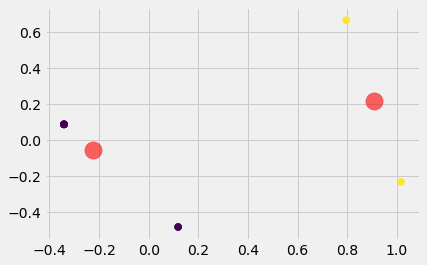

In [7]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

In [8]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)
dfs

[    features     score
 0      trade  0.550933
 1     booked  0.550933
 2      recap  0.502588
 3      valid  0.176381
 4   verified  0.000000
 5  duplicate  0.000000,     features     score
 0   verified  0.685760
 1  duplicate  0.364020
 2      valid  0.329227
 3      recap  0.147413
 4      trade  0.000000
 5     booked  0.000000]

You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


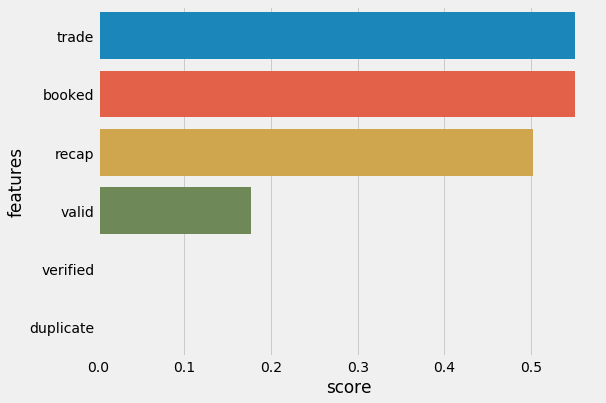

In [9]:
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])